In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
!ls data/

column_descriptions.md kc_house_data.csv


In [3]:
df = pd.read_csv('data/kc_house_data.csv')

## Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Check column names for reference
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Hooray no duplicates!
df.duplicated().value_counts()

False    21597
dtype: int64

In [8]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

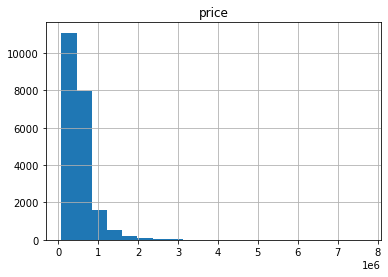

In [9]:
df.hist('price', bins = 20)

In [10]:
df[df['price'] > 5e+06]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730


In [11]:
df.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [12]:
df[df['bedrooms']>10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Perhaps the outlier Lindsey mentioned is this 33 bedroom house?

Prices doesnt seem to contain outlier, and neither does dates which is good. Could be possible to restrict prices to more accurately predict values near the median, but probably not worth it.

Will check sqft and lot size and floors and bathrooms for other outliers.

In [13]:
df.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [14]:
df[df['sqft_living'] > 10000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Some huge houses here, two of the 3 largest are also the two highest prices homes. Can't say any are outliers though.

In [15]:
df.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [16]:
df[df['sqft_lot'] > 1000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.00,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
7640,2623069031,5/21/2014,542500.0,5,3.25,3010,1074218,1.5,NaN,0.0,...,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,2323089009,1/19/2015,855000.0,4,3.50,4030,1024068,2.0,0.0,0.0,...,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
17305,3326079016,5/4/2015,190000.0,2,1.00,710,1164794,1.0,0.0,0.0,...,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


In [17]:
df[df['price'] > 1000000]
# wow 1458 million dollar homes in here

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
69,1802000060,6/12/2014,1330000.0,5,2.25,3200,20158,1.0,0.0,0.0,...,8,1600,1600.0,1965,0.0,98004,47.6303,-122.215,3390,20158
70,1525059190,9/12/2014,1040000.0,5,3.25,4770,50094,1.0,0.0,0.0,...,11,3070,1700.0,1973,0.0,98005,47.6525,-122.160,3530,38917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,5/14/2014,1220000.0,4,3.50,4910,9444,1.5,0.0,0.0,...,11,3110,1800.0,2007,0.0,98074,47.6502,-122.066,4560,11063
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,0.0,2.0,...,10,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,...,10,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125
21584,249000205,10/15/2014,1540000.0,5,3.75,4470,8088,2.0,0.0,0.0,...,11,4470,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964


In [18]:
df.zipcode.value_counts().index

Int64Index([98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023,
            98006, 98133, 98059, 98058, 98155, 98074, 98033, 98027, 98125,
            98056, 98053, 98001, 98075, 98126, 98092, 98144, 98106, 98116,
            98029, 98199, 98004, 98065, 98122, 98146, 98028, 98008, 98040,
            98198, 98003, 98072, 98031, 98112, 98168, 98055, 98107, 98136,
            98178, 98030, 98177, 98166, 98022, 98105, 98045, 98002, 98077,
            98011, 98019, 98108, 98119, 98005, 98007, 98188, 98032, 98014,
            98070, 98109, 98102, 98010, 98024, 98148, 98039],
           dtype='int64')

### Checking all zipcodes are indeed in KC WA

In [19]:
kc_zipcodes = '''98052
98103
98115
98122
98133
98109
98034
98125
98003
98105
98004
98118
98023
98033
98042
98102
98092
98058
98121
98107
98198
98056
98117
98155
98059
98032
98006
98002
98116
98144
98031
98168
98027
98119
98030
98038
98007
98101
98029
98011
98001
98146
98112
98106
98040
98072
98126
98188
98104
98074
98008
98055
98199
98166
98028
98178
98022
98005
98108
98075
98053
98177
98136
98057
98045
98065
98070
98019
98148
98077
98354
98014
98010
98047
98251
98024
98051
98039
98093
98071
98009
98073
98083
98063
98064
98111
98015
98041
98138
98127
98035
98165
98145
98124
98062
98025
98050
98139
98113
98175
98013
98114
98134
98288
98194
98164
98160
98224
98141
98089
98068
98054
98129
98131
98132
98151
98154
98158
98161
98170
98171
98174
98181
98184
98185
98190
98191
98195
98471
98481'''

In [20]:
kc_zipcodes = kc_zipcodes.split('\n')
kc_zipcodes

['98052',
 '98103',
 '98115',
 '98122',
 '98133',
 '98109',
 '98034',
 '98125',
 '98003',
 '98105',
 '98004',
 '98118',
 '98023',
 '98033',
 '98042',
 '98102',
 '98092',
 '98058',
 '98121',
 '98107',
 '98198',
 '98056',
 '98117',
 '98155',
 '98059',
 '98032',
 '98006',
 '98002',
 '98116',
 '98144',
 '98031',
 '98168',
 '98027',
 '98119',
 '98030',
 '98038',
 '98007',
 '98101',
 '98029',
 '98011',
 '98001',
 '98146',
 '98112',
 '98106',
 '98040',
 '98072',
 '98126',
 '98188',
 '98104',
 '98074',
 '98008',
 '98055',
 '98199',
 '98166',
 '98028',
 '98178',
 '98022',
 '98005',
 '98108',
 '98075',
 '98053',
 '98177',
 '98136',
 '98057',
 '98045',
 '98065',
 '98070',
 '98019',
 '98148',
 '98077',
 '98354',
 '98014',
 '98010',
 '98047',
 '98251',
 '98024',
 '98051',
 '98039',
 '98093',
 '98071',
 '98009',
 '98073',
 '98083',
 '98063',
 '98064',
 '98111',
 '98015',
 '98041',
 '98138',
 '98127',
 '98035',
 '98165',
 '98145',
 '98124',
 '98062',
 '98025',
 '98050',
 '98139',
 '98113',
 '98175',


In [21]:
kc = [int(float(i)) for i in kc_zipcodes]

In [22]:
len(kc_zipcodes)

130

In [23]:
df[df['zipcode'].isin(kc)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [24]:
len(df)

21597

In [25]:
df[df['zipcode']==98014]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
350,7325600160,6/4/2014,299000.0,1,0.75,560,12120,1.0,NaN,0.0,...,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
569,4045500710,12/18/2014,405000.0,2,0.75,1160,15029,1.0,0.0,0.0,...,6,870,290.0,1937,0.0,98014,47.6929,-121.870,1870,25346
920,4046500320,1/20/2015,342000.0,3,1.75,1660,16275,2.0,0.0,0.0,...,7,1660,0.0,1990,0.0,98014,47.6903,-121.915,1520,16275
1195,8658300260,12/9/2014,361000.0,3,1.75,1150,17585,1.0,0.0,0.0,...,7,1150,0.0,1964,0.0,98014,47.6503,-121.908,1200,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,1825079046,12/18/2014,580000.0,3,2.50,1820,374616,2.0,0.0,0.0,...,7,1820,0.0,1999,0.0,98014,47.6539,-121.959,1870,220654
21123,8658301060,8/20/2014,310000.0,2,1.75,1160,2500,2.0,NaN,0.0,...,7,1160,0.0,2008,NaN,98014,47.6489,-121.911,970,7500
21195,4045500950,4/15/2015,425000.0,3,1.50,1680,8000,1.5,NaN,0.0,...,7,1680,0.0,2012,0.0,98014,47.6923,-121.869,1990,26336
21370,774101755,4/17/2015,320000.0,3,1.75,1790,66250,1.5,0.0,0.0,...,7,1790,0.0,2003,0.0,98014,47.7179,-121.403,1440,59346


### Check thumbs up
Just checked and all the zipcodes are indeed Kings County WA

In [26]:
df.duplicated('id').value_counts()

False    21420
True       177
dtype: int64

In [27]:
df.date.describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

Ideas for categorical amenities:

Use waterfront and view, (maybe something like > 5 bathrooms?)
to see if any speficic luxury amenity has a large (or larger than the others) effect on price. 

Eg. what if waterfront is always correllated with high price but view isnt always. 

** BUT here there is risk of multicolinearity, waterfront houses are certain to have a better veiw rating, so this probably isnt the best. Maybe check and see if waterfront boolean means a high view rating, and if it does just throw out waterfront in the model.

In [28]:
np.sqrt(len(df))
# this is the maximum number of features a model could include

146.9591780053223

### Check our assumptions for linear regression

Multicolinearlity etc

In [29]:
# First select info for smaller df

kc = df[['price', 'sqft_lot', 'zipcode', 'view']]

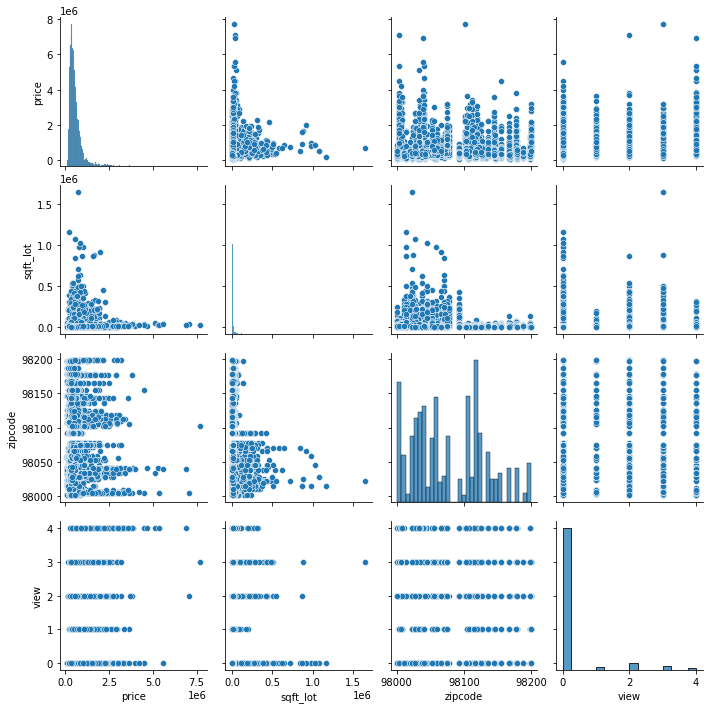

In [30]:
sns.pairplot(kc)

In [31]:
# dummy encoding zipcode
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)
data = pd.concat([df['price'], df['sqft_lot'], df['sqft_living'], df['waterfront'], df['sqft_lot15'], zip_dummies], axis=1)
data.head()

,price,sqft_lot,sqft_living,waterfront,sqft_lot15,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,5650,1180,NaN,5650,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,7242,2570,0.0,7639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,10000,770,0.0,8062,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,5000,1960,0.0,5000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,8080,1680,0.0,7503,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.dropna(subset=['waterfront'], inplace=True)

In [33]:
# model test for zipcode dummy
X = data.drop('price', axis=1)
y = data['price']

model = sm.OLS(y, sm.add_constant(X))


In [34]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     890.4
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:20:30   Log-Likelihood:            -2.5960e+05
No. Observations:               19221   AIC:                         5.193e+05
Df Residuals:                   19147   BIC:                         5.199e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.869e+05   1.03e+04    -18.220      0.000   -2.07e+05   -1.67e+05
sqft_lot        0.3216      0.046      6.995      0.000       0.231       0.412
sqft_living   242.3284      1.578    153.612      0.000     239.236     245.421
waterfront   9.031e+05   1.52e+04     59.397      0.000    8.73e+05    9.33e+05
sqft_lot15      0.0010      0.070      0.014      0.989      -0.137       0.139
zip_98002    2.486e+04   1.65e+04      1.503      0.133   -7553.451    5.73e+04
zip_98003    1.214e+04   1.49e+04      0.817      0.414    -1.7e+04    4.13e+04
zip_98004    8.356e+05   1.45e+04     57.519      0.000    8.07e+05    8.64e+05
zip_98005    3.474e+05   1.73e+04     20.113      0.000    3.14e+05    3.81e+05
zip_98006    3.401e+05   1.31e+04     25.980      0.000    3.14e+05    3.66e+05
zip_98007    2.744e+05   1.89e+04     14.493      0.000    2.37e+05    3.11e+05
zip_98008     2.86e+05   1.49e+04     19.259      0.000    2.57e+05    3.15e+05
zip_98010    6.982e+04   2.15e+04      3.240      0.001    2.76e+04    1.12e+05
zip_98011    1.285e+05   1.67e+04      7.710      0.000    9.58e+04    1.61e+05
zip_98014    9.056e+04      2e+04      4.533      0.000    5.14e+04     1.3e+05
zip_98019    7.124e+04    1.7e+04      4.199      0.000     3.8e+04    1.04e+05
zip_98022    3.571e+04   1.59e+04      2.245      0.025    4530.611    6.69e+04
zip_98023    -1.68e+04   1.29e+04     -1.298      0.194   -4.22e+04    8560.436
zip_98024    1.552e+05   2.33e+04      6.661      0.000     1.1e+05    2.01e+05
zip_98027      1.8e+05   1.35e+04     13.309      0.000    1.54e+05    2.07e+05
zip_98028    1.302e+05   1.49e+04      8.763      0.000    1.01e+05    1.59e+05
zip_98029    2.418e+05   1.43e+04     16.890      0.000    2.14e+05     2.7e+05
zip_98030    3073.4638   1.52e+04      0.202      0.840   -2.67e+04    3.29e+04
zip_98031    1.751e+04    1.5e+04      1.164      0.244    -1.2e+04     4.7e+04
zip_98032    1.589e+04   1.93e+04      0.824      0.410   -2.19e+04    5.37e+04
zip_98033    4.019e+05   1.35e+04     29.849      0.000    3.76e+05    4.28e+05
zip_98034    2.202e+05   1.27e+04     17.302      0.000    1.95e+05    2.45e+05
zip_98038    2.741e+04   1.25e+04      2.189      0.029    2868.542    5.19e+04
zip_98039     1.41e+06   2.84e+04     49.593      0.000    1.35e+06    1.47e+06
zip_98040    5.866e+05   1.51e+04     38.767      0.000    5.57e+05    6.16e+05
zip_98042    1.199e+04   1.27e+04      0.943      0.346   -1.29e+04    3.69e+04
zip_98045    1.117e+05   1.63e+04      6.853      0.000    7.98e+04    1.44e+05
zip_98052    2.521e+05   1.26e+04     19.954      0.000    2.27e+05    2.77e+05
zip_98053    2.148e+05   1.36e+04     15.765      0.000    1.88e+05    2.42e+05
zip_98055     5.67e+04   1.52e+04      3.738      0.000     2.7e+04    8.64e+04
zip_98056    1.068e+05   1.35e+04      7.89

In [36]:
type(y)

pandas.core.series.Series

In [116]:
 suburb_dict = {
               'Auburn': [98001, 98002, 98092],
               'Ballard': [98117, 98107],
               'Bellevue': [98004, 98005, 98006, 98007, 98008],
               'Black Diamond': [98010],
               'Bothell': [98011],
               'Broadview': [98177, 98133],
               'Burien': [98146, 98148, 98166, 98168],
               'Capital Hill': [98102, 98112],
               'Carnation': [98014],
               'Covington': [98042],
               'Delridge': [98106],
               'Des Moines': [98198],
               'Duvall': [98019],
               'Enumclaw': [98022],
               'Fall City': [98024],
               'Federal Way': [98003],
               'Greenwood': [98103],
               'Issaquah': [98027, 98029],
               'Kenmore': [98028],
               'Kent': [98030, 98031, 98032],
               'Kirkland': [98033, 98034],
               'Lake City': [98125],
               'Lake Forest Park': [98155],
               'Lynnwood': [98037],
               'Madrona': [98122],
               'Magnolia': [98199],
               'Maple Valley': [98038],
               'Medina': [98039],
               'Mercer Island': [98040],
               'Milton': [98354],
               'Mount Baker': [98144],
               'North Bend': [98045],
               'Northeast Seattle': [98115],
               'Pacific': [98047],
               'Ravensdale': [98051],
               'Rainier Valley': [98108, 98118],
               'Redmond': [98052, 98053],
               'Renton': [98055, 98056, 98057, 98058, 98059, 98178],
               'Sammamish': [98074, 98075],
               'Seattle': [98134, 98101, 98104, 98121],
               'Skykomish': [98288],
               'Snoqualmie': [98065],
               'Tukwila': [98188],
               'Queen Anne': [98119, 98109],
               'University': [98105, 98195],
               'Vashon': [98070],
               'West Seattle': [98116, 98126, 98136],
               'Woodinville': [98072]
               }

In [38]:
zips = []
for key, value in suburb_dict.items():
    for x in value:
        zips.append(x)

In [39]:
len(zips)

78

In [40]:
len(set(zips))

78

In [41]:
import collections
print([item for item, count in collections.Counter(zips).items() if count > 1])

[]


## Trying model with suburb instead of zipcode
This increases the area boundaries in about half the zipcodes; eg. combines multiple into larger area, rather than cut up a zipcode into smaller sections 

In [56]:
df = pd.read_csv('data/kc_house_data.csv')

In [57]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [58]:
df = df[['price', 'sqft_living', 'sqft_lot', 'waterfront', 'zipcode', 'sqft_lot15']]

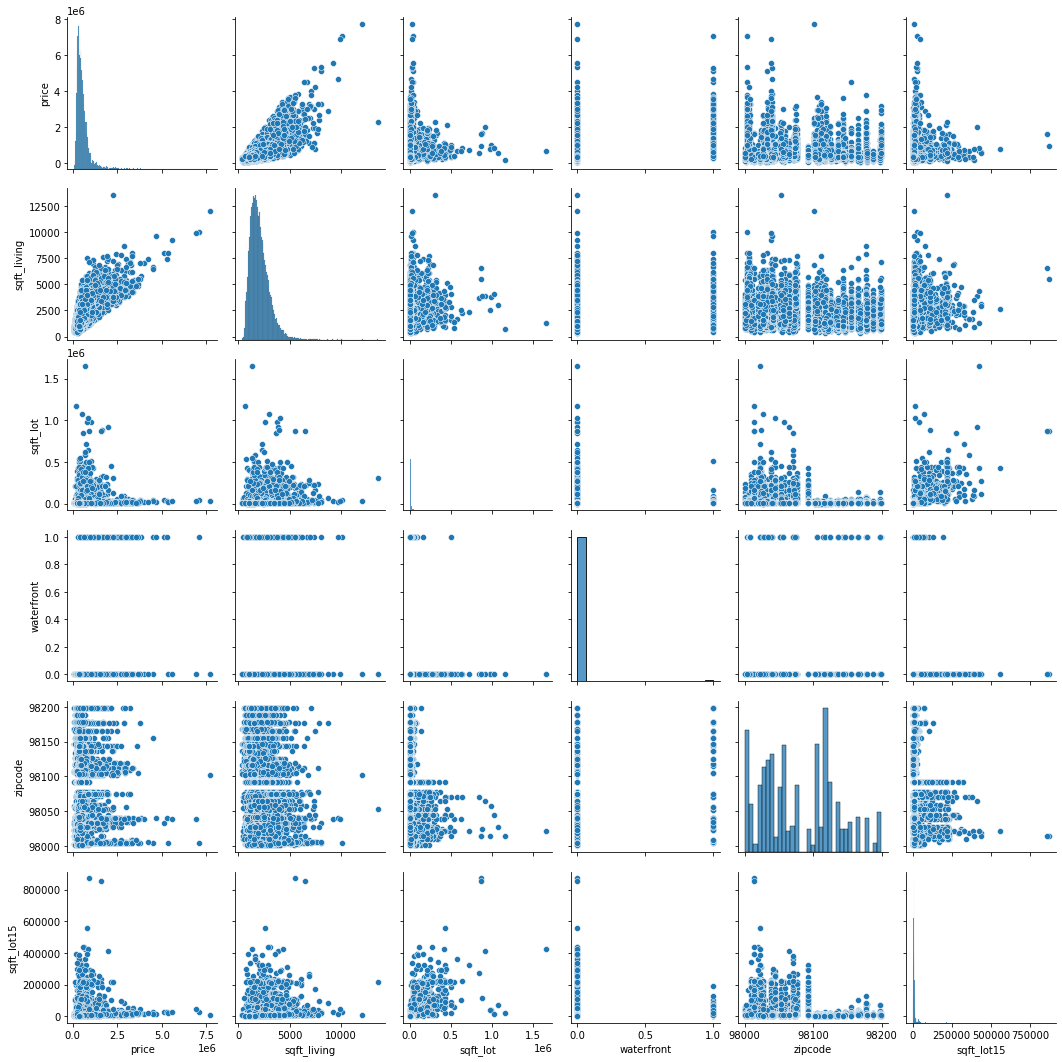

In [59]:
sns.pairplot(df)

In [117]:
for key, values in suburb_dict.items():
    df[key] = df['zipcode'].map(lambda x: 1 if (x in values) else 0)
    
df.drop('zipcode', axis=1, inplace=True)

KeyError: 'zipcode'

In [61]:
df.head()

,price,sqft_living,sqft_lot,waterfront,sqft_lot15,Auburn,Ballard,Bellevue,Black Diamond,Bothell,...,Renton,Sammamish,Seattle,Skykomish,Snoqualmie,Tukwila,Queen Anne,University,West Seattle,Woodinville
0,221900.0,1180,5650,NaN,5650,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,0.0,7639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,770,10000,0.0,8062,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,0.0,5000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,1680,8080,0.0,7503,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
df.dropna(subset=['waterfront'], inplace=True)

In [114]:
df[df['waterfront'] == 1].price.mean()

1717214.7260273972

In [115]:
df.price.mean()

541639.8338275844

In [111]:
X = df.drop(['price'], axis=1)
y = df['price']

model = sm.OLS(y, sm.add_constant(X))

In [112]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1232.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        01:17:18   Log-Likelihood:            -2.6077e+05
No. Observations:               19221   AIC:                         5.216e+05
Df Residuals:                   19175   BIC:                         5.220e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.731e+05   7884.973    -21.949      0.000   -1.89e+05   -1.58e+05
sqft_living         250.1767      1.639    152.670      0.000     246.965     253.389
sqft_lot              0.2991      0.049      6.136      0.000       0.204       0.395
waterfront         8.825e+05   1.59e+04     55.527      0.000    8.51e+05    9.14e+05
sqft_lot15            0.0154      0.074      0.209      0.835      -0.129       0.160
Auburn            -3.119e+04   9660.606     -3.228      0.001   -5.01e+04   -1.23e+04
Ballard            3.347e+05   9999.588     33.476      0.000    3.15e+05    3.54e+05
Bellevue           4.008e+05   8905.081     45.013      0.000    3.83e+05    4.18e+05
Black Diamond      3.962e+04   2.15e+04      1.845      0.065   -2463.562    8.17e+04
Bothell            9.705e+04   1.59e+04      6.085      0.000    6.58e+04    1.28e+05
Broadview          1.914e+05   1.02e+04     18.741      0.000    1.71e+05    2.11e+05
Burien             6.545e+04   9862.164      6.637      0.000    4.61e+04    8.48e+04
Capital Hill       6.307e+05   1.26e+04     50.180      0.000    6.06e+05    6.55e+05
Carnation          6.058e+04   1.96e+04      3.094      0.002    2.22e+04     9.9e+04
Covington          -1.72e+04   1.11e+04     -1.549      0.121    -3.9e+04    4560.341
Delridge           1.207e+05   1.31e+04      9.228      0.000     9.5e+04    1.46e+05
Des Moines         4741.8347   1.41e+04      0.337      0.736   -2.28e+04    3.23e+04
Duvall             4.046e+04   1.62e+04      2.494      0.013    8657.977    7.23e+04
Enumclaw           8403.6028   1.49e+04      0.563      0.573   -2.08e+04    3.77e+04
Fall City          1.244e+05   2.34e+04      5.323      0.000    7.86e+04     1.7e+05
Federal Way       -1.652e+04   1.38e+04     -1.198      0.231   -4.36e+04    1.05e+04
Greenwood           3.41e+05   1.08e+04     31.458      0.000     3.2e+05    3.62e+05
Issaquah           1.749e+05   1.02e+04     17.195      0.000    1.55e+05    1.95e+05
Kenmore                1e+05   1.38e+04      7.254      0.000     7.3e+04    1.27e+05
Kent              -1.715e+04   1.05e+04     -1.631      0.103   -3.78e+04    3460.264
Kirkland           2.692e+05   9579.834     28.096      0.000     2.5e+05    2.88e+05
Lake City          1.883e+05   1.22e+04     15.457      0.000    1.64e+05    2.12e+05
Lake Forest Park   1.345e+05   1.18e+04     11.368      0.000    1.11e+05    1.58e+05
Lynnwood           -7.82e-11   5.35e-12    -14.615      0.000   -8.87e-11   -6.77e-11
Madrona            3.587e+05   1.37e+04     26.168      0.000    3.32e+05    3.86e+05
Magnolia           4.189e+05   1.34e+04     31.205      0.000    3.93e+05    4.45e+05
Maple Valley      -2976.0973   1.08e+04     -0.275      0.783   -2.42e+04    1.82e+04
Medina             1.367e+06   2.92e+04     46.881      0.000    1.31e+06

## Scaling X standard scalar

In [67]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()

In [98]:
X_toscale = X[['sqft_living', 'sqft_lot', 'sqft_lot15']]
X_cate = X.drop(columns=['sqft_living', 'sqft_lot', 'sqft_lot15'], inplace=True)

In [99]:
X_scal = sc.fit_transform(X_toscale)
X_scal = pd.DataFrame(X_scal)
type(X_scal)

pandas.core.frame.DataFrame

In [105]:
X_scaled = pd.concat([X_scal, X_cate], axis=1)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [108]:
X_scaled_df

,waterfront,Auburn,Ballard,Bellevue,Black Diamond,Bothell,Broadview,Burien,Capital Hill,Carnation,...,Renton,Sammamish,Seattle,Skykomish,Snoqualmie,Tukwila,Queen Anne,University,West Seattle,Woodinville
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
model = sm.OLS(y, sm.add_constant(X_scaled_df))
results = model.fit()

results.summary()

MissingDataError: exog contains inf or nans

## Log transforming features

In [79]:
non_normal = ['sqft_living', 'sqft_lot', 'sqft_lot15']
X_log = X

y_log = np.log(y)

In [80]:
for feat in non_normal:
    X_log[feat] = np.log(X[feat])

In [81]:
model = sm.OLS(y_log, sm.add_constant(X_log))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1775.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:52:11   Log-Likelihood:                 804.73
No. Observations:               19221   AIC:                            -1517.
Df Residuals:                   19175   BIC:                            -1156.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2019      0.077      2.628      0.009       0.051       0.353
sqft_living           5.3203      0.034    158.532      0.000       5.254       5.386
sqft_lot              0.5081      0.045     11.397      0.000       0.421       0.596
waterfront            0.7747      0.020     39.677      0.000       0.736       0.813
sqft_lot15            0.2767      0.049      5.599      0.000       0.180       0.374
Auburn               -0.1455      0.012    -12.223      0.000      -0.169      -0.122
Ballard               0.7720      0.013     60.744      0.000       0.747       0.797
Bellevue              0.7028      0.011     64.390      0.000       0.681       0.724
Black Diamond         0.0708      0.026      2.681      0.007       0.019       0.122
Bothell               0.3041      0.020     15.498      0.000       0.266       0.343
Broadview             0.4126      0.013     32.629      0.000       0.388       0.437
Burien                0.0616      0.012      5.076      0.000       0.038       0.085
Capital Hill          1.0404      0.016     65.795      0.000       1.009       1.071
Carnation             0.1200      0.024      5.026      0.000       0.073       0.167
Covington            -0.0725      0.014     -5.302      0.000      -0.099      -0.046
Delridge              0.2444      0.016     14.971      0.000       0.212       0.276
Des Moines           -0.0618      0.017     -3.572      0.000      -0.096      -0.028
Duvall                0.1502      0.020      7.532      0.000       0.111       0.189
Enumclaw             -0.0677      0.018     -3.705      0.000      -0.103      -0.032
Fall City             0.2514      0.029      8.781      0.000       0.195       0.307
Federal Way          -0.1195      0.017     -7.045      0.000      -0.153      -0.086
Greenwood             0.7878      0.014     56.683      0.000       0.761       0.815
Issaquah              0.4701      0.013     37.198      0.000       0.445       0.495
Kenmore               0.2696      0.017     15.892      0.000       0.236       0.303
Kent                 -0.1052      0.013     -8.119      0.000      -0.131      -0.080
Kirkland              0.5429      0.012     45.988      0.000       0.520       0.566
Lake City             0.4379      0.015     29.075      0.000       0.408       0.467
Lake Forest Park      0.2844      0.015     19.544      0.000       0.256       0.313
Lynnwood           9.265e-16   1.13e-17     81.942      0.000    9.04e-16    9.49e-16
Madrona               0.7972      0.017     46.101      0.000       0.763       0.831
Magnolia              0.8333      0.017     49.837      0.000       0.801       0.866
Maple Valley          0.0279      0.013      2.088      0.037       0.002       0.054
Medina                1.3222      0.036     36.975      0.000       1.252

### Log and scaled

In [86]:
X_log_sc = sc.fit_transform(X_log)